## Question 4

Load the breast cancer dataset from sklearn package. Perform exploratory data analysis and  set  up  a  KNN  classifier.  Propose  an  appropriate  value  for  K.  Show  the  relevant performance metrics. Assess whether scaling the data improves the performance.

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score


pd.set_option("display.max_columns", None)
data = load_breast_cancer(as_frame=True)

Let's display the dataset for the first few rows to get a sense of it

In [2]:
data['frame'].head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
rows, columns = data['frame'].shape

print(f"There are {rows} rows and {columns} columns in the dataset")

There are 569 rows and 31 columns in the dataset


In [4]:
data['frame'].dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

From the above dataset, there is a target column in it, indicating a target variable that's required for supervised learning classification. The shape tells us that there are `569` data points and `30` features of continuous values.

Let's get a sense of the type of the different classes and respective target values

In [5]:
pd.DataFrame(data["target_names"], columns=['Cancer Type']).transpose()

,0,1
Cancer Type,malignant,benign


Determining the dataset distribution of classes,

In [6]:
pd.DataFrame([
    [0, data["target"][data["target"] == 0].count()], 
    [1, data["target"][data["target"] == 1].count()]
], columns=["Class", "Count"])

,Class,Count
0,0,212
1,1,357


Now, let's find for any missing data to deal with,

In [7]:
data['frame'][data['frame'].isnull().any(axis=1)]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target


In [8]:
data['frame'].isnull().values.any()

False

We find that there are no missing values to be cleaned in the given dataset.

Let's display some descriptive statistics to get a sense of the dataset variance for each of the features,

In [9]:
X = data["data"]
y = data["target"]

In [10]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


To get a better breakdown based on the target values, we will use box-plot for each features,

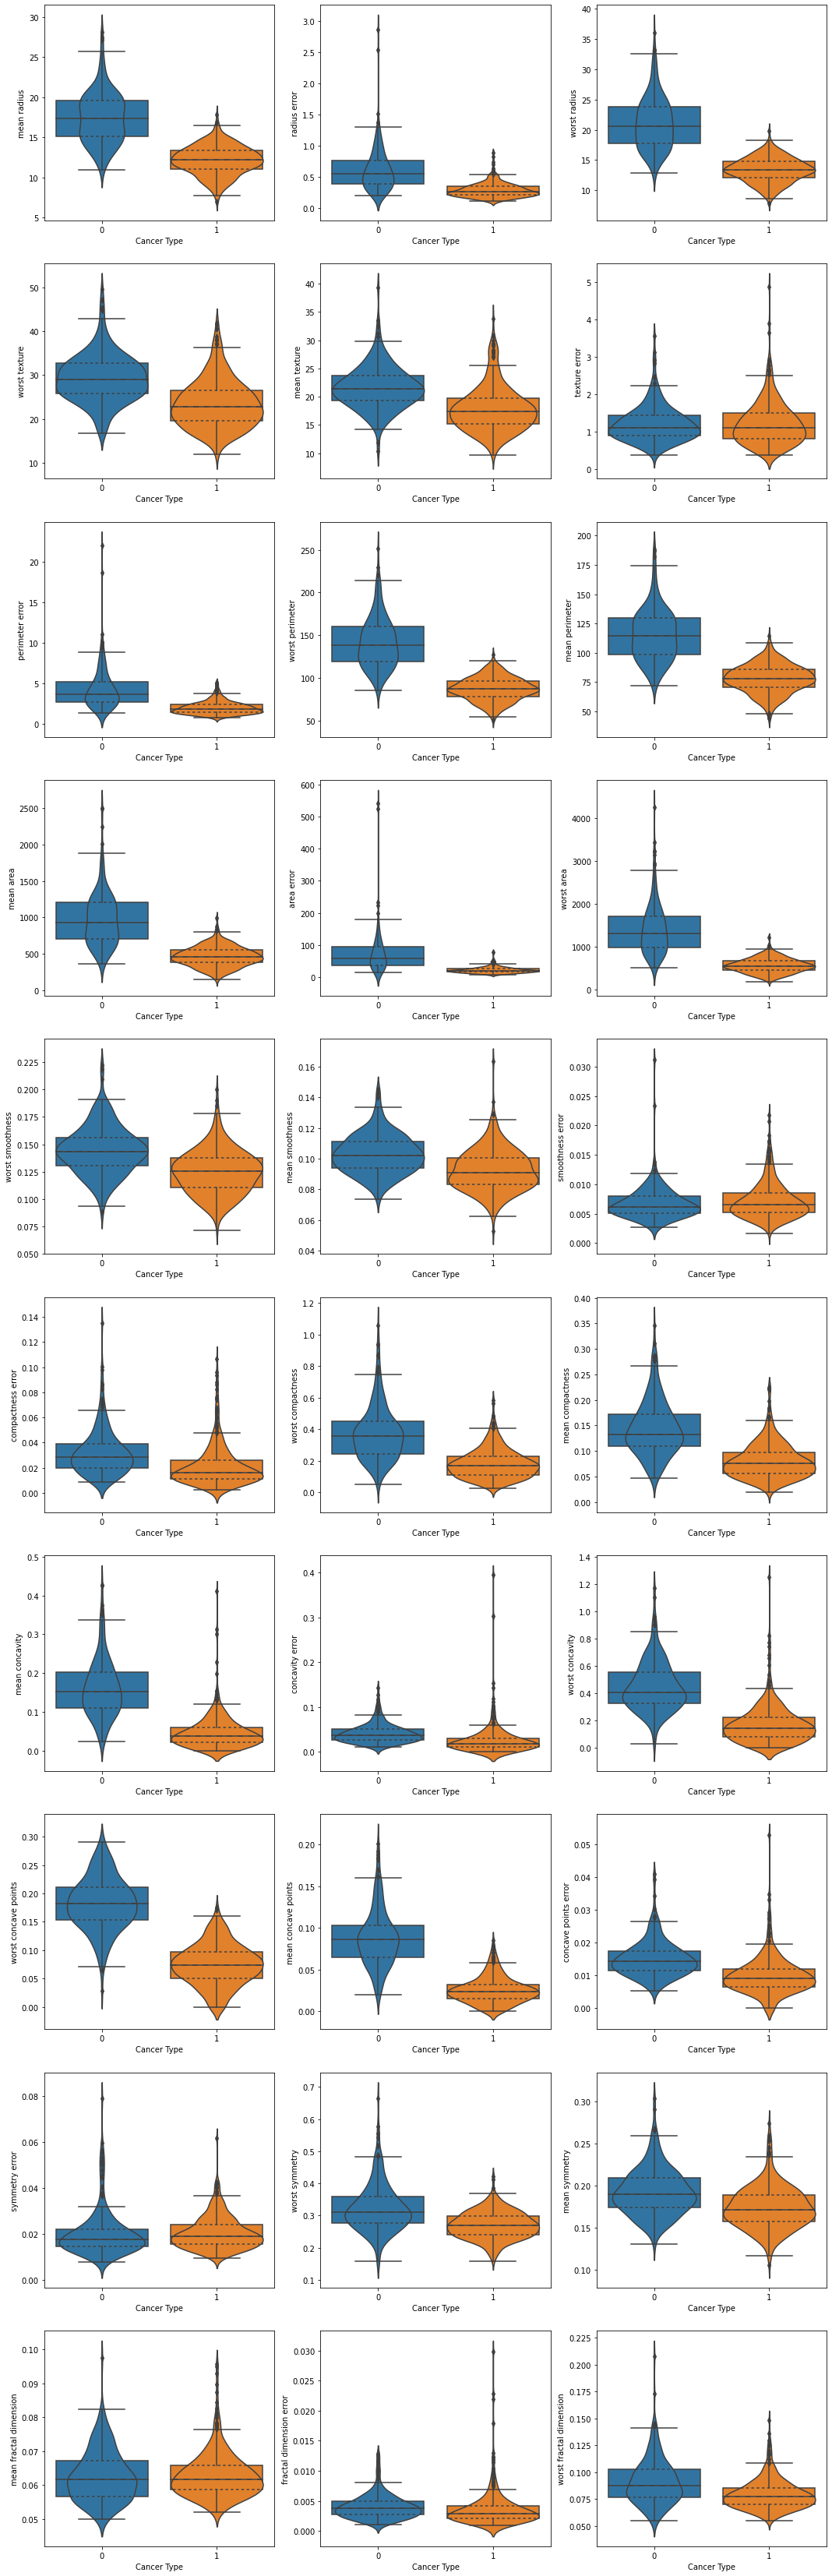

In [11]:
from itertools import zip_longest
from math import ceil
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(10, 3)
fig.set_figheight(60)
fig.set_figwidth(18)

target_title = "Cancer Type"

for index, feature_name in enumerate(data["feature_names"]):
    df = pd.DataFrame(zip_longest(X[feature_name].values, y), columns=[feature_name, target_title])
    ax = sns.violinplot(x=target_title, y=feature_name, data=df, inner="quartile", ax=axs[index % 10, index % 3])
    ax = sns.boxplot(x=target_title, y=feature_name, data=df, ax=axs[index % 10, index % 3])

From the above, we can see some features (e.g. `texture error`) have a seemingly high entropy. These features may create noise in our classification, and depending on one's discretion, these features can be dropped for the classification.

After exploring our data, let's split our data into training and test datasets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)
'''we stratify so that we would have equal proportions of each class as observed in the original dataset'''

print ("Shape of X_train = ",X_train.shape)
print ("Shape of y_train = ",y_train.shape)
print ("Shape of X_test = ",X_test.shape)
print ("Shape of y_test = ",y_test.shape)

Shape of X_train =  (455, 30)
Shape of y_train =  (455,)
Shape of X_test =  (114, 30)
Shape of y_test =  (114,)


Finding the suitable $k$ by applying cross-validation across various $k$ values,

In [13]:
from sklearn.neighbors import KNeighborsClassifier

scores_range = (1, 100, 2)
scores = []
error_rate = []

for k in range(*scores_range):
    # creating the model with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # collection cross validation score
    val_score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append((k, val_score.min(), val_score.max(), val_score.mean(), val_score.std()))
    
    # collection predicition errors
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))
    
df_scores = pd.DataFrame(scores, columns=['k', 'min-score', 'max-score', 'average', 'std'])
df_scores = df_scores.sort_values(by=['average', 'std'], ascending=[False, True])
df_scores.head(10)

,k,min-score,max-score,average,std
2,5,0.912088,0.945055,0.925275,0.010767
5,11,0.901099,0.945055,0.923077,0.013900
3,7,0.901099,0.945055,0.923077,0.015541
9,19,0.890110,0.956044,0.923077,0.021978
4,9,0.890110,0.945055,0.920879,0.017582
6,13,0.901099,0.956044,0.920879,0.018906
7,15,0.901099,0.956044,0.920879,0.018906
8,17,0.901099,0.956044,0.920879,0.020143
11,23,0.879121,0.956044,0.920879,0.028146
10,21,0.879121,0.956044,0.918681,0.026556


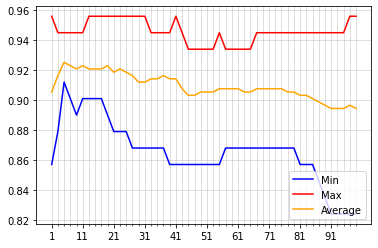

In [14]:
# plotting the min, max and average cross validation scores
fig = plt.figure()

major_ticks = np.arange(scores_range[0], scores_range[1], scores_range[1] / 10)
minor_ticks = np.arange(*scores_range)

ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.grid(which='both', alpha=0.5)

plt.plot(list(range(*scores_range)), [item[1] for item in scores], '-', color='blue')
plt.plot(list(range(*scores_range)), [item[2] for item in scores], '-', color='red')
plt.plot(list(range(*scores_range)), [item[3] for item in scores], '-', color='orange')
plt.legend(['Min', 'Max', 'Average'], loc='lower right')

plt.show()

By comparing the average cross validation scores for each k neighbours, we can see that $k=5$ has the best average cross validation score. It also has the lowest standard deviation, suggesting consistency. Lets now plot the mean error on predictions for each k neighbours.

Text(0, 0.5, 'Error Rate')

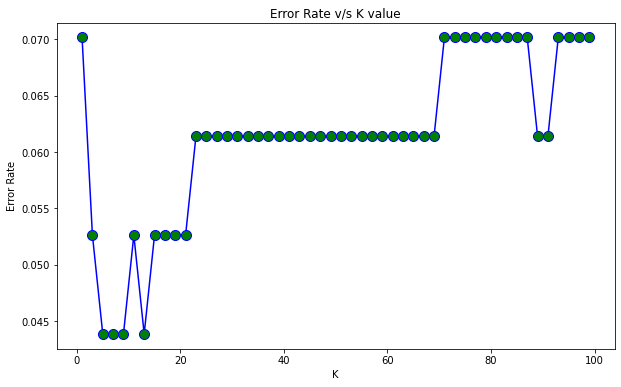

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(*scores_range),error_rate,color='blue',linestyle='solid',marker='o',markerfacecolor='green',markersize=10)
plt.title('Error Rate v/s K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [16]:
score_range_list = np.asarray(range(*scores_range))
error_rates = np.where(error_rate == np.asarray(error_rate).min())
score_range_list[list(error_rates[0])]

array([ 5,  7,  9, 13])

#### Conclusion on choosing $k=5$
We observe that the least prediction errors are k-neighbours $5$, $7$, $9$ and $13$, we will pick $k=5$ as it has both the highest cross validation score and the least mean prediction errors.

In [17]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y1_pred = knn.predict(X_test)

In [18]:
print(f"Accuracy score: {metrics.accuracy_score(y1_pred, y_test)}", end=f"\n\n{'=='*30}\n\n")

print(classification_report(y_test, y1_pred), end=f"\n\n{'=='*30}\n\n")

Accuracy score: 0.956140350877193


              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114





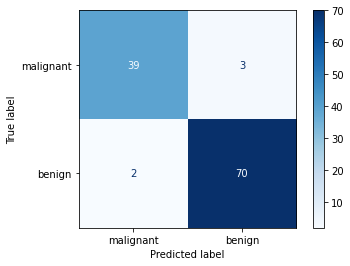

In [19]:
plot_confusion_matrix(knn, X_test, y_test, display_labels=data["target_names"], cmap=plt.cm.Blues)

From the confusion matrix we can see that there are a total of 5 false predictions (3 false positives and 2 false negatives) out of a total of 114 predictions

In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X1_train = sc.fit_transform(X_train)
X1_test = sc.transform(X_test)

Let's train the KNN model again with the standardized dataset.

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X1_train, y_train)
y_pred = knn.predict(X1_test)

In [22]:
print(f"Accuracy score: {metrics.accuracy_score(y_pred, y_test)}", end=f"\n\n{'=='*30}\n\n")

print(classification_report(y_test, y_pred), end=f"\n\n{'=='*30}\n\n")

Accuracy score: 0.9736842105263158


              precision    recall  f1-score   support

           0       1.00      0.93      0.96        42
           1       0.96      1.00      0.98        72

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114





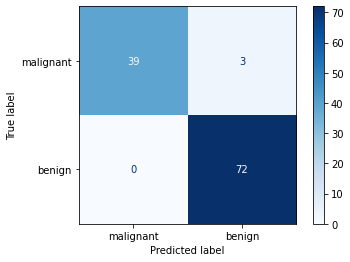

In [23]:
plot_confusion_matrix(knn, X1_test, y_test, display_labels=data["target_names"], cmap=plt.cm.Blues)

After scaling the dataset, we observe that the model's accuracy score has improved (0.9737% vs 0.956%) and the f1 score has also improved on predicting both benign and malign breast cancers.

To conclude, scaling does improve the performance of KNN model. Because the k-nearest neighbour algorithm relies on majority voting based on the class membership of $k$-nearest samples for a given test point, the near-ness of samples is based on distance metrics such as Euclidean algorithm for $p=2$ (or Manhattan distance for $p=1$ or Minkowski distance for more).

To illustrate why it improves the performance, let's take an example of a KNN trained model with unscaled data for a binary classification problem (Class: `0` - black, `1` - green).

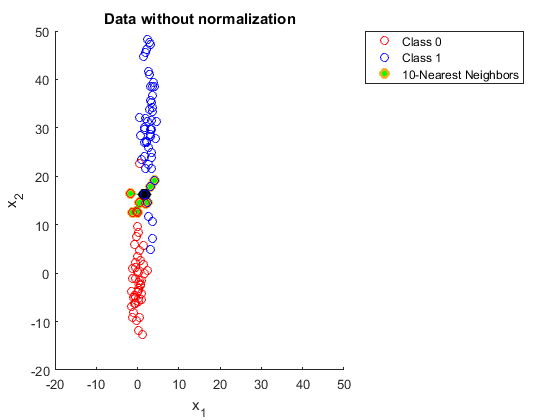

And with the scaled data,

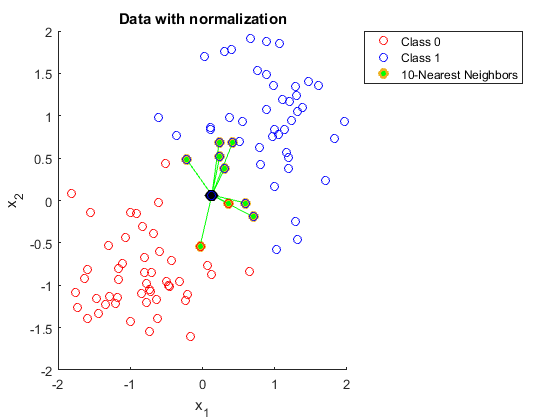

(Source: [@kedarps | Stackoverflow.com, 2017](https://stats.stackexchange.com/questions/287425/why-do-you-need-to-scale-data-in-knn))

We noticed that without scaling, all the nearest neighbours are aligned in the direction of the axis with smaller range, thus leading to incorrect classification.